# Exploration Notebook of Tom

In [139]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from Biscuit import Biscuit
from Problem import Problem

In [7]:
data = pd.read_csv('../DATA/defects.csv', sep=',')
data.head()

,x,class
0,355.449335,c
1,92.496236,a
2,141.876795,c
3,431.833902,c
4,435.028461,c


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   class   500 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [9]:
data.describe()

,x
count,500.000000
mean,246.098987
std,143.914271
min,0.700561
25%,123.001773
50%,242.137840
75%,371.495959
max,499.403445


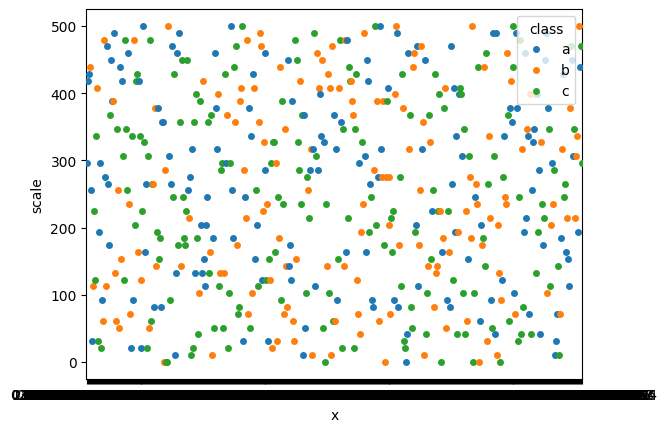

In [15]:
scale = np.linspace(0, 500, 50)

data['scale'] = np.tile(scale, len(data) // len(scale) + 1)[:len(data)]

sns.stripplot(data=data, x='x', y='scale', hue='class')

plt.show()

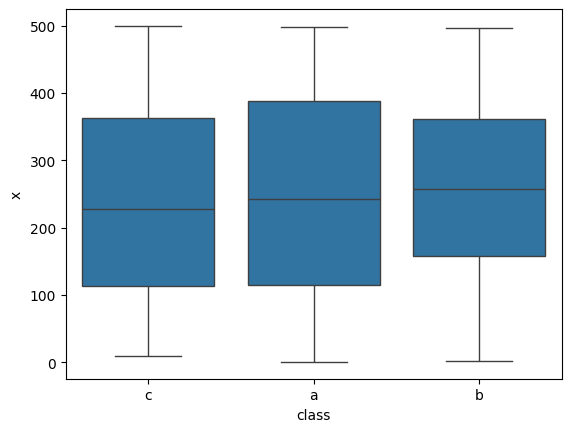

In [29]:
sns.boxplot(data=data, x='class', y='x')

plt.show()

In [35]:
data.drop('scale', axis=1, inplace=True)
data['class'].value_counts()

class
c    177
a    164
b    159
Name: count, dtype: int64

In [36]:

a, b, c = 0, 0, 0
n_a, n_b, n_c = 0, 0, 0
for i in range(0, data.shape[0]):
    if(data.loc[i, 'class'] == 'a'):
        a = a + data.loc[i, 'x']
        n_a = n_a + 1
    elif(data.loc[i, 'class'] == 'b'):
        b = b + data.loc[i, 'x']
        n_b = n_b + 1
    else:
        c = c + data.loc[i, 'x']
        n_c = n_c + 1


    
print("Moyenne de la position l'anomalie a : " + str(a/n_a))
print("Moyenne de la position l'anomalie b : " + str(b/n_b))
print("Moyenne de la position l'anomalie c : " + str(c/n_c))


Moyenne de la position l'anomalie a : 246.60763207226827
Moyenne de la position l'anomalie b : 253.9832389438299
Moyenne de la position l'anomalie c : 238.54523540446505


In [37]:
liste = []

for i in range(0, data.shape[0]):
    if(data.loc[i, 'x'] < 8):
        liste.append([data.loc[i, 'x'], data.loc[i, 'class']])

print(liste)

[[3.998342415845013, 'b'], [2.313037949608188, 'a'], [0.8481851067991264, 'a'], [1.7698245161513748, 'a'], [3.701163868821245, 'a'], [0.7005610475633861, 'a'], [2.2072298478902352, 'b']]


In [38]:
rounded_data= data.copy()

In [39]:
rounded_data['x'] = rounded_data['x'].round(0)


In [40]:
rounded_data.head()

,x,class
0,355.0,c
1,92.0,a
2,142.0,c
3,432.0,c
4,435.0,c


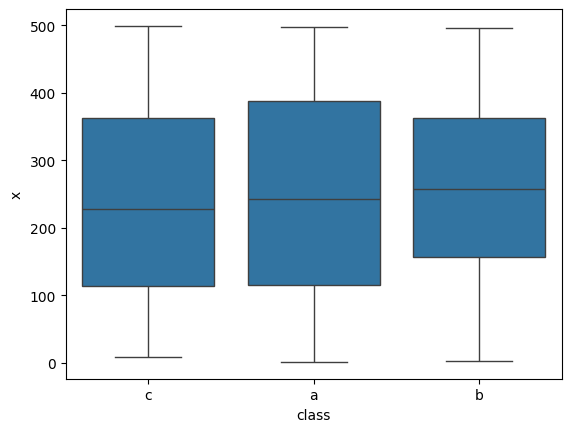

In [41]:
sns.boxplot(data=rounded_data, x='class', y='x')

plt.show()

In [42]:
a, b, c = 0, 0, 0
n_a, n_b, n_c = 0, 0, 0
for i in range(0, rounded_data.shape[0]):
    if(rounded_data.loc[i, 'class'] == 'a'):
        a = a + rounded_data.loc[i, 'x']
        n_a = n_a + 1
    elif(rounded_data.loc[i, 'class'] == 'b'):
        b = b + rounded_data.loc[i, 'x']
        n_b = n_b + 1
    else:
        c = c + rounded_data.loc[i, 'x']
        n_c = n_c + 1


    
print("Moyenne de la position l'anomalie a : " + str(a/n_a))
print("Moyenne de la position l'anomalie b : " + str(b/n_b))
print("Moyenne de la position l'anomalie c : " + str(c/n_c))

Moyenne de la position l'anomalie a : 246.6158536585366
Moyenne de la position l'anomalie b : 253.9433962264151
Moyenne de la position l'anomalie c : 238.51977401129943


In [45]:
from Biscuit import Biscuit

In [70]:
_biscuits = [
    Biscuit(name="Biscuit 0", length=4, value=3, defects_thresholds={'a': 4, 'b': 2, 'c': 3}),
    Biscuit(name="Biscuit 1", length=8, value=12, defects_thresholds={'a': 5, 'b': 4, 'c': 4}),
    Biscuit(name="Biscuit 2", length=2, value=1, defects_thresholds={'a': 1, 'b': 2, 'c': 1}),
    Biscuit(name="Biscuit 3", length=5, value=8, defects_thresholds={'a': 2, 'b': 3, 'c': 2}),
]

In [136]:
def optimize_segment(segment_start, segment_end, defects, biscuits, step):
    total_value = 0
    x = segment_start

    # Liste pour stocker les biscuits placés (nom, position de départ, longueur)
    placed_biscuits = []

    # Générer dynamiquement les biscuits vides en fonction du pas (step)
    empty_biscuits = [
        Biscuit(name=f"no_biscuit_{i}", length=i, value=-i, defects_thresholds={'a': float('inf'), 'b': float('inf'), 'c': float('inf')})
        for i in range(1, 15)  # Créer des biscuits de taille 1 à 14 unités
    ]

    # Ajouter les biscuits vides aux biscuits standards
    biscuits += empty_biscuits

    # Traçage initial de la longueur totale et de la taille des biscuits
    print(f"Longueur totale du segment : {segment_end - segment_start}m")
    for b in biscuits:
        print(f"Biscuit disponible : {b.name}, Longueur : {b.length}, Valeur : {b.value}")

    while x < segment_end:
        placed_biscuit = False
        for biscuit in biscuits:
            # Vérifier s'il y a suffisamment d'espace pour placer le biscuit et s'il respecte les seuils de défauts
            if x + biscuit.length <= segment_end and biscuit.can_place(x, defects):
                total_value += biscuit.value  # Ajouter la valeur du biscuit au total
                # Enregistrer le biscuit placé avec son nom, sa position de départ, et sa longueur
                placed_biscuits.append((biscuit.name, x, biscuit.length))
                x += biscuit.length  # Sauter les positions couvertes par ce biscuit
                placed_biscuit = True

                # Traçage détaillé
                print(f"Biscuit placé : {biscuit.name}, Longueur : {biscuit.length}, Position : {x - biscuit.length}")
                break

        if not placed_biscuit:
            # Si aucun biscuit ne peut être placé, avancer de 'step' et appliquer une pénalité
            total_value -= 1  # Pénalité pour espace vide
            x += 1  # Passer à la prochaine unité entière
            print(f"Aucun biscuit placé, avance de 1 unité, nouvelle position : {x}")

    # Afficher la liste des biscuits placés pour vérifier s'il y a chevauchement ou autre problème
    print(f"Liste des biscuits placés : {placed_biscuits}")
    print(f"Valeur totale calculée pour le segment : {total_value}")

    return total_value, placed_biscuits


In [137]:
result_value, placed_biscuits = optimize_segment(segment_start=0.0, segment_end=500.0, defects=data, biscuits=_biscuits, step=1)

print(f"Valeur totale pour le segment : {result_value}€")
print(f"Biscuits placés : {placed_biscuits}")


Longueur totale du segment : 500.0m
Biscuit disponible : Biscuit 0, Longueur : 4, Valeur : 3
Biscuit disponible : Biscuit 1, Longueur : 8, Valeur : 12
Biscuit disponible : Biscuit 2, Longueur : 2, Valeur : 1
Biscuit disponible : Biscuit 3, Longueur : 5, Valeur : 8
Biscuit disponible : no_biscuit_1, Longueur : 1, Valeur : -1
Biscuit disponible : no_biscuit_2, Longueur : 2, Valeur : -2
Biscuit disponible : no_biscuit_3, Longueur : 3, Valeur : -3
Biscuit disponible : no_biscuit_4, Longueur : 4, Valeur : -4
Biscuit disponible : no_biscuit_5, Longueur : 5, Valeur : -5
Biscuit disponible : no_biscuit_6, Longueur : 6, Valeur : -6
Biscuit disponible : no_biscuit_7, Longueur : 7, Valeur : -7
Biscuit disponible : no_biscuit_8, Longueur : 8, Valeur : -8
Biscuit disponible : no_biscuit_9, Longueur : 9, Valeur : -9
Biscuit disponible : no_biscuit_10, Longueur : 10, Valeur : -10
Biscuit disponible : no_biscuit_11, Longueur : 11, Valeur : -11
Biscuit disponible : no_biscuit_12, Longueur : 12, Valeur 

In [141]:
problem = Problem(
    start_position=0.0,
    end_position=50.0,
    defects=data,
    biscuits=_biscuits,
    step=1   
)

In [162]:
from Pb import *

In [163]:
pb = BiscuitOptimization(data)